<a href="https://colab.research.google.com/github/suhail1796/Appliances-Energy-Prediction/blob/main/Capstone_Project_2_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Appliances Energy Prediction




## Problem Statement:

* To predict appliance energy consumption for a house based on factors
like temperature, humidity and pressure
*   In order to achieve this, we need to develop a supervised machine learning model using regression algorithms


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import scale

Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv',parse_dates =['date'] )

Reading the dataset

In [ ]:
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


Converting column names into lower case for ease of operation

In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
df = df.set_index('date')

In [ ]:
df.head(2)

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [ ]:
df.shape

(19735, 28)

Checking for Null Values

In [ ]:
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9         

In [ ]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


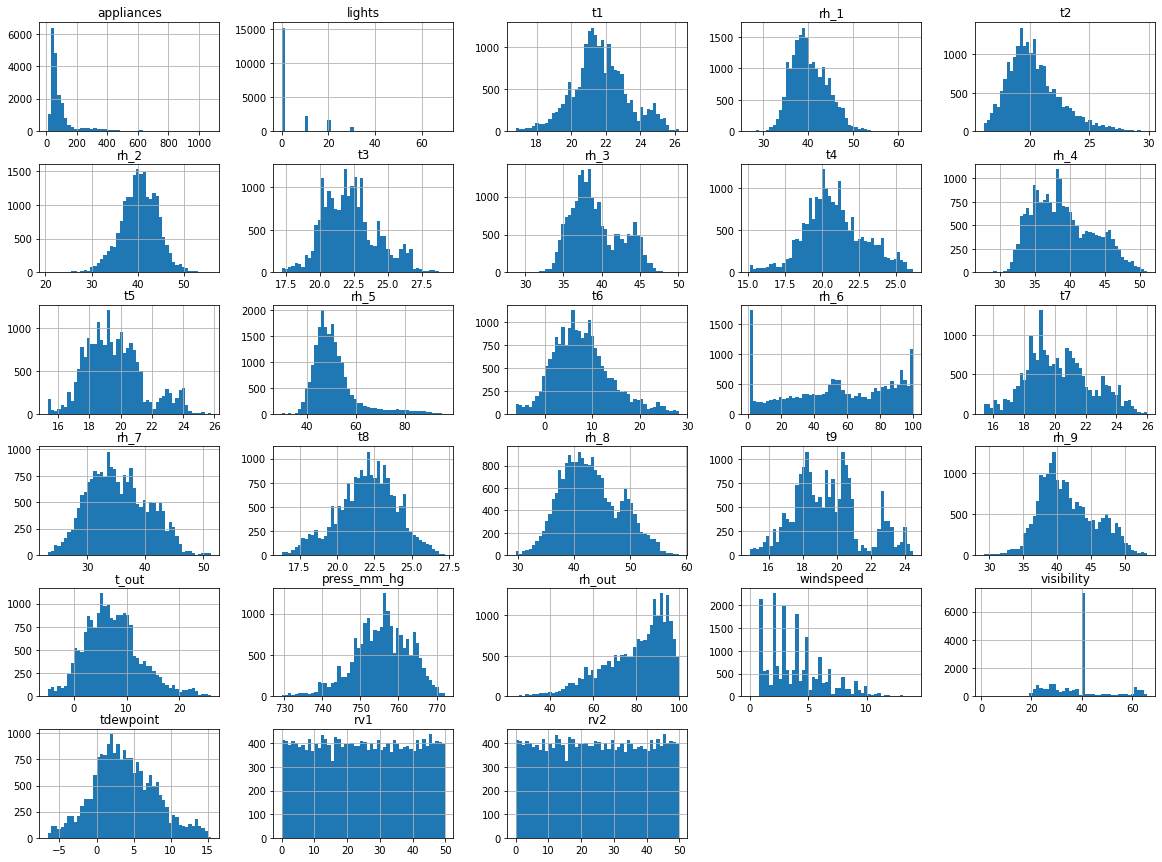

In [ ]:
df.hist(bins = 50,figsize=(20,15))
plt.savefig('attribute_histogram_plots')
plt.show()

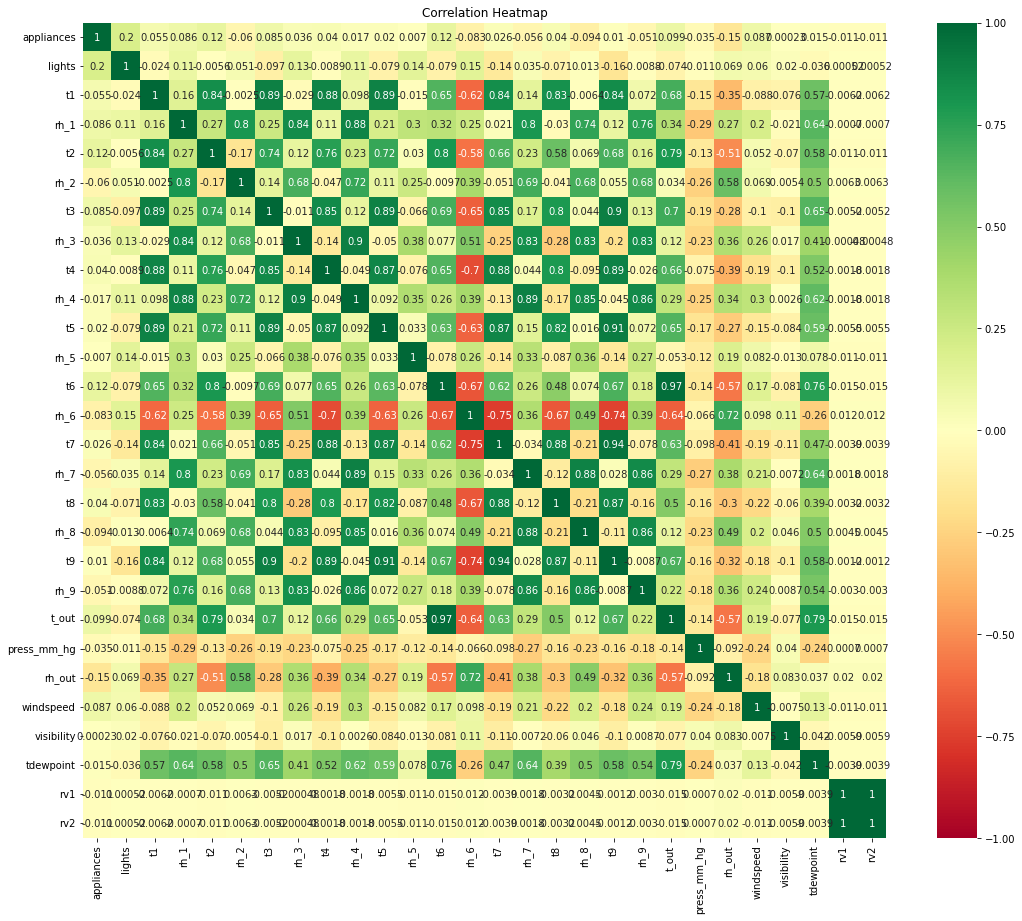

In [ ]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='RdYlGn')
plt.title("Correlation Heatmap")
plt.show()

* Dealing with Outliers

In [ ]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,18.890000,51.881667,0.466667,96.090000,19.790,37.184286,20.926667,42.663333,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,17.856667,37.608333,-1.600000,90.933333,17.290,28.225000,19.356667,37.429444,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,17.100000,53.000000,4.966667,74.166667,17.600,38.530000,18.200000,45.590000,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,20.890000,45.833333,16.830000,12.730000,21.790,36.466667,24.666667,42.526667,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,17.867778,37.728333,-1.730000,91.230000,17.235,28.153889,19.390000,37.228889,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


In [ ]:
len(sorted_appliances.head(len(sorted_appliances)//1000))

19

In [ ]:
sorted_appliances.appliances[19]


790

In [ ]:
sorted_appliances = df.sort_values('appliances',ascending=False)
print('The number of the 0,1% top values of appliance load is',
     len(sorted_appliances.head(len(sorted_appliances)//1000)),'and they have power load higher than',
      sorted_appliances.appliances[19],'Wh.')

The number of the 0,1% top values of appliance load is 19 and they have power load higher than 790 Wh.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


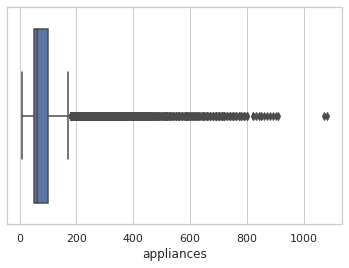

In [ ]:
sns.set(style='whitegrid')
ax = sns.boxplot(sorted_appliances.appliances)

In [ ]:
df = df.dropna()
df = df.drop(df[(df.appliances>790) | (df.appliances<0)].index)

Adding New Features 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month

In [ ]:
df['log_appliances'] = np.log(df.appliances)

In [ ]:
df['house_temp'] = (df.t1 + df.t2 + df.t3 + df.t4 + df.t5 + df.t7 + df.t8 + df.t9)/8

In [ ]:
df['house_humd'] = (df.rh_1 + df.rh_2 + df.rh_3 + df.rh_4 + df.rh_5 + df.rh_7 + df.rh_8 + df.rh_9)/8

In [ ]:
df['hour*lights'] = df.hour * df.lights
df['t3rh3'] = df.t3 * df.rh_3
df['t2rh2'] = df.t2 * df.rh_2
df['t1rh1'] = df.t1 * df.rh_1
df['t4rh4'] = df.t4 * df.rh_4
df['t5rh5'] = df.t5 * df.rh_5
df['t6rh6'] = df.t6 * df.rh_6
df['t7rh7'] = df.t7 * df.rh_7
df['t8rh8'] = df.t8 * df.rh_8
df['t9rh9'] = df.t9 * df.rh_9

In [ ]:
def code_mean(data,cat_feature,real_feature):
  return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
df['weekday_avg'] = list(map(
    code_mean(df[:],'weekday','appliances').get,df.weekday))
df['hour_avg'] = list(map(
    code_mean(df[:],'hour','appliances').get,df.hour))

In [ ]:
df_hour = df.resample('1H').mean()
df_30min = df.resample('30min').mean()

In [ ]:
df_hour['low_consum'] = (df_hour.appliances + 25 <(df_hour.hour_avg)) * 1
df_hour['high_consum'] = (df_hour.appliances + 25 >(df_hour.hour_avg)) * 1

## Exploratory Data Analysis :-

In [ ]:
def daily(x,df=df):
  return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
  return df.groupby('hour')[x].mean()
def monthly_daily(x,df=df):
  by_day = df.pivot_table(index='weekday',
                          columns=['month'],
                          values=x,
                          aggfunc = 'mean')
  return round(by_day,ndigits=2)

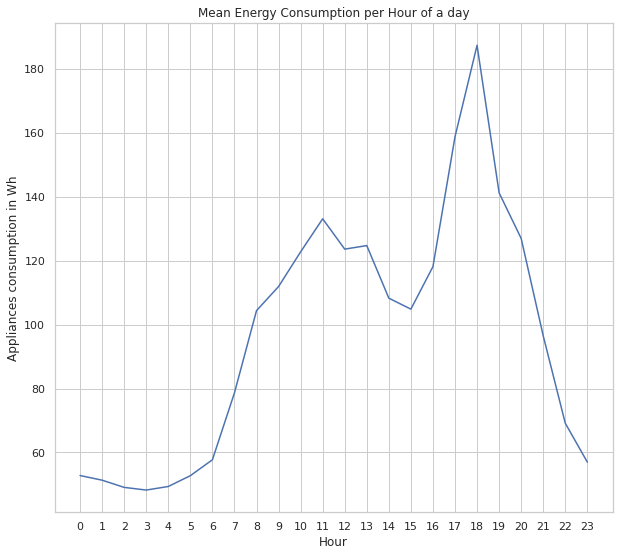

In [ ]:
hourly('appliances').plot(figsize=(10,9))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Consumption per Hour of a day')
plt.xticks(ticks);


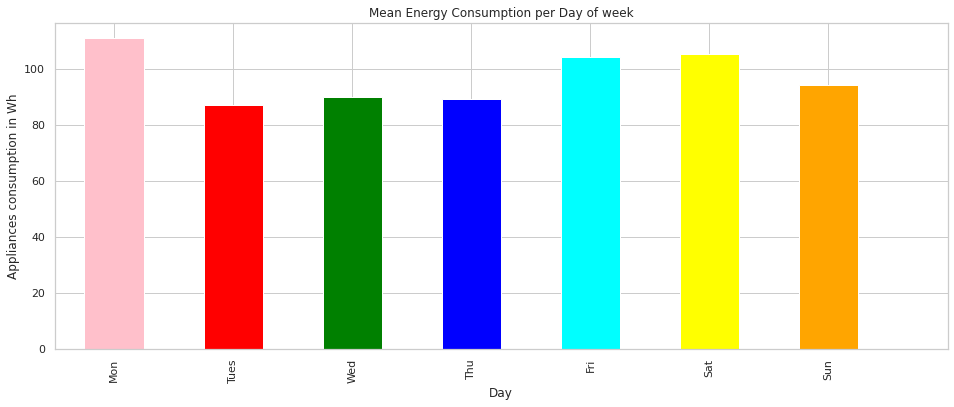

In [ ]:
daily('appliances').plot(kind='bar',color=['pink','red','green','blue','cyan','yellow','orange'],figsize=(16,6))
ticks=list(range(0,7,1))
labels='Mon Tues Wed Thu Fri Sat Sun'.split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,8,1))
plt.title('Mean Energy Consumption per Day of week')
plt.xticks(ticks,labels);


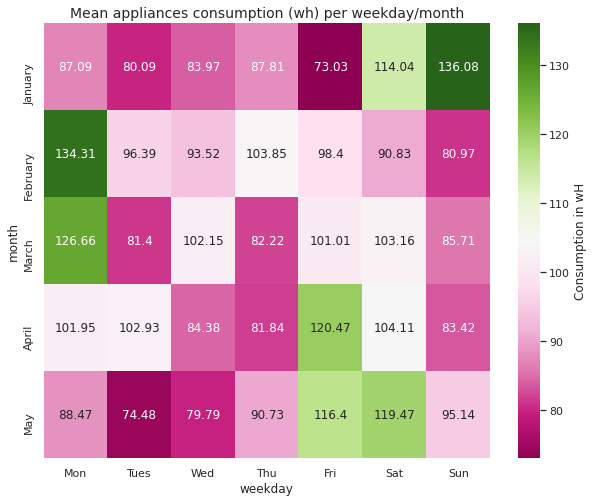

In [ ]:
sns.set(rc={'figure.figsize':(10,8)},)
ax = sns.heatmap(monthly_daily('appliances').T,cmap='PiYG',
                 xticklabels='Mon Tues Wed Thu Fri Sat Sun'.split(),
                 yticklabels='January February March April May'.split(),
                 annot=True,fmt='g',
                 cbar_kws={'label':'Consumption in wH'}).set_title('Mean appliances consumption (wh) per weekday/month').set_fontsize('14')
plt.show()

Text(0.5, 0, 'Appliance Log Wh')

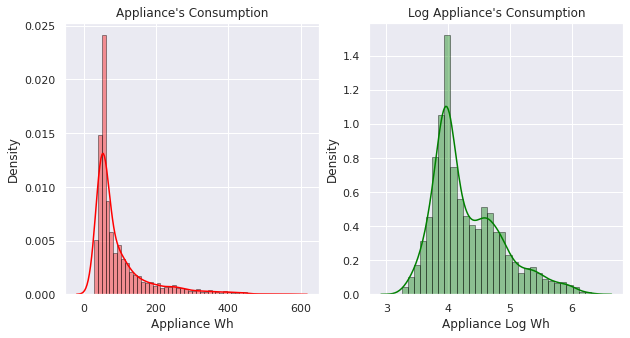

In [ ]:
f,axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_hour.appliances,hist=True,color='red',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's Consumption")
axes[0].set_xlabel("Appliance Wh")

sns.distplot(df_hour.log_appliances,hist=True,color='green',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's Consumption")
axes[1].set_xlabel("Appliance Log Wh")

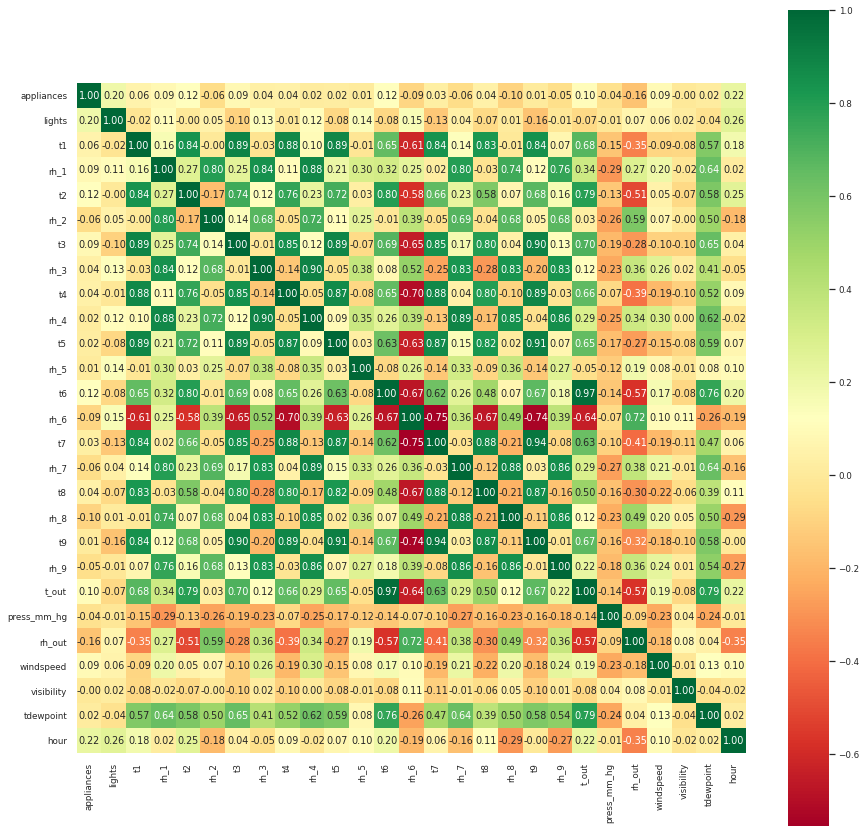

In [ ]:
col = ['appliances',         'lights',             't1',           'rh_1',
                   't2',           'rh_2',             't3',           'rh_3',
                   't4',           'rh_4',             't5',           'rh_5',
                   't6',           'rh_6',             't7',           'rh_7',
                   't8',           'rh_8',             't9',           'rh_9',
                't_out',    'press_mm_hg',         'rh_out',      'windspeed',
           'visibility',      'tdewpoint',           'hour']
corr = df[col].corr()
plt.figure(figsize=(15,15))
sns.set(font_scale=0.8)
sns.heatmap(corr,cbar=True,annot=True,square=True,cmap='RdYlGn',fmt='.2f',xticklabels=col,yticklabels=col)
plt.show();        

In [ ]:
for cat_feature in ['weekday','hour']:
  df_hour = pd.concat([df_hour,pd.get_dummies(df_hour[cat_feature])],axis=1)
  df_30min = pd.concat([df_30min,pd.get_dummies(df_30min[cat_feature])],axis=1)
  df = pd.concat([df,pd.get_dummies(df[cat_feature])],axis=1)
  

In [ ]:
lin_model = ['low_consum','high_consum','hour','t6','rh_6','lights','hour*lights','windspeed','t6rh6']

* Splitting data into Train & Test Set

In [ ]:
test_size = 0.2
test_index = int(len(df_hour.dropna())*(1-test_size))
X_train,X_test = df_hour[lin_model].iloc[:test_index,],df_hour[lin_model].iloc[test_index:,]
y_train = df_hour.log_appliances.iloc[:test_index,]
y_test = df_hour.log_appliances.iloc[test_index:,]

In [ ]:
X_train = scale(X_train)
X_test = scale(X_test)

## Model Implementation :-

In [ ]:
from sklearn import linear_model
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation :-

In [ ]:
def evaluate(model,test_features,test_labels):
  predictions = model.predict(test_features)
  errors = abs(predictions - test_labels)
  mape = 100 * np.mean(errors/test_labels)
  rscore = 100 * r2_score(test_labels,predictions)
  accuracy = 100 - mape
  print(model,'\n')
  print('Average Error          :{:0.4f} degrees'.format(np.mean(errors)))
  print('Variance Score         :{:0.2f}%'.format(rscore))
  print('Accuracy               :{:0.2f}%'.format(accuracy))

In [ ]:
evaluate(lin_model,X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Average Error          :0.2998 degrees
Variance Score         :32.30%
Accuracy               :93.31%


In [ ]:
y_pred = lin_model.predict(X_test)

Text(0.5, 0.01, 'Fitted Values')

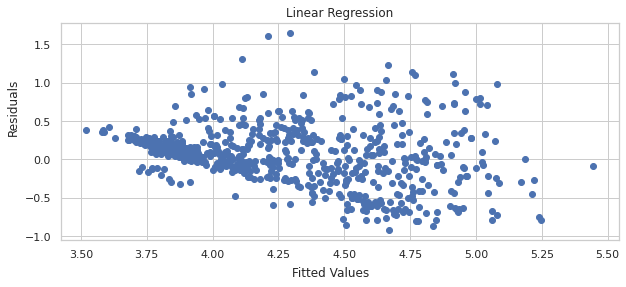

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(y_pred,y_test-y_pred)
ax.set_title('Linear Regression')
fig.text(0.06,0.5,'Residuals',ha='center',rotation='vertical')
fig.text(0.5,0.01,'Fitted Values',ha='center',va='center')

Text(0.5, 0.01, 'True Values')

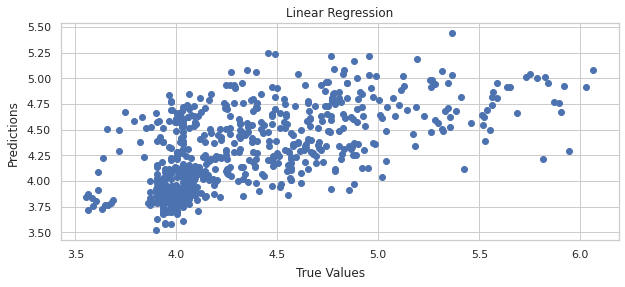

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(y_test,y_pred)
ax.set_title('Linear Regression')
fig.text(0.06,0.5,'Predictions',ha='center',va='center',rotation='vertical')
fig.text(0.5,0.01,'True Values',ha='center',va='center')

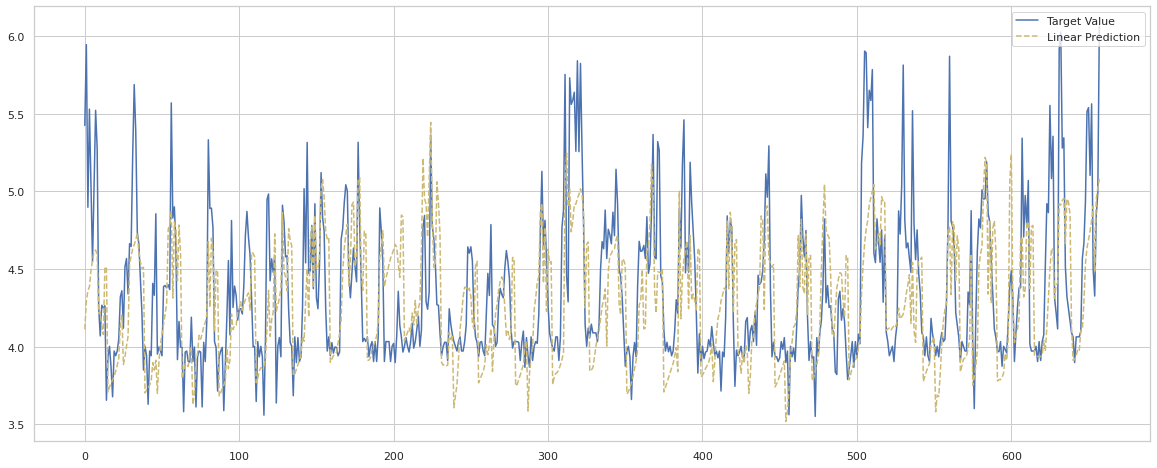

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Target Value',color='b')
plt.plot(y_pred,label='Linear Prediction',linestyle='--',color='y')
plt.legend(loc=1)

## Conclusion :-

* We have implemented Linear Regression Model with Accuracy of 93.31%

* From EDA we can conclude that Energy Consumption is higher in evening
from 5 pm to 7 pm

* Energy consumption is higher on Monday in every week

* In month of January energy consumption is higher on Sunday and in other month it is higher on Monday

## References :-


*   Kaggle
*   Github
*   Youtube
*   Towards data science
*   Analytics Vidya
*   Stack over flow

